
    
    
## <H2 align="center"> <font color='white'> **MAF1731B**: Microstructure and Trading Systems </H2>

### <H3 align="center"> <font color='white'> **Project: EUR/USD** Behavior during Initial Jobless Claims statements </H3>

 <H5 align="center"> <em> Professor: Villalobos Ramos Omar Antonio <em>

 <p align="center"> <img style=" margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="350" height="150" /> 

 <strong> <H5 align="left"> Student:
Esteban Márquez Delgado <strong>

 *Registry*:
if700637: https://github.com/EstebanMqz/MyST_Project

 <center> <font color= #555555> <font size = 4> November 2022 </a> <font color= #555555> <font size = 4> </a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Project </font> <br> <br> <font color= #555555> <font size = 5> 
Project 1: Fundamental Analysis </font>

<hr style="border:0.02in solid gray"> </hr>

### <font color= #555555> <font size = 4> Abstract </font>

This document was prepared as Final Project for Microstructure and Trading Systems - MAF1731B class during the Autumn 2022 course at ITESO for the Bachelor of Financial Engineering. 

It has the following sections:

1. *Description*.

2. *Description*.

3. *Description*.



<font color= lightblue> <font size = 4> 0. Libraries and Dependencies: </font>

<font color= gray>

**Note**: To run this notebook it is necessary to have the following libraries contained in the [requirements.txt](https://github.com/EstebanMqz/MyST_LAB_4/blob/main/requirements.txt) script of this project.

To install the libraries in the script run the following cell:

In [17]:
!pip install -r requirements.txt

ERROR: Invalid requirement: '"""' (from line 1 of requirements.txt)


If you prefer, manual installation can be done with the individual installation of the following libraries:

<font color= lightblue> <font size = 1> 
+ pandas >= 1.3.4
+ pandas_datareader >= 0.10.0
+ numpy >= 1.19.1
+ jupyter >= 1.0.0
+ chart_studio >= 1.1
+ plotly >= 5.60
+ scipy >= 1.7.3
+ regex >= 2022.3.15
+ time >= 3.11 
+ datetime >= 4.7
+ MetaTrader5 >= 5.0.43
+ pytz >= 2021.3
+ fire >= 0.4.0
+ kaleido >= 0.2.1


### <font color= white> <font size = 4> 0.1 Introduction: </font>

<font color= lightblue> <font size = 3> Description: </font>

<font color= lightgray>
Jobless claims reports are provided on a weekly basis each Thursday at 8.30 am ET by the Employment and Training Administration in Department of Labor and it measures Unemployment Insurance (UI) benefits in the form of weekly payments to eligible workers. 


The following are the categories for jobless claims:
1. **Initial Jobless Claims:** The report is a measure that declares how many citizens filed for state unemployment insurance for the *first time* in the previous week.

2. **Continuing Jobless Claims:** It is a measure that states the number of individuals who are already receveing unemployment benefits and they *re-applied* for them in the previous week.

It provides Actual, Previous and Consensus estimates in *(thousands)* and it is an important indicator because there's an inverse relationship between jobless claims results and employment:

+ As claims decrease, higher consumption and stronger economic growth follows.
+ As claims rise, employment numbers fall, consumption decreases and economic growth declines.

<font color= lightblue> <font size = 3> Readings: </font>
<font color= lightgray>

There are two types of readings for reports:

+ **Beat**: Lower claims numbers than the market Consensus, *better than expected*.
+ **Miss**: Higher claims numbers than the market Consensus, *worse than expected*.




##### *General help:*
<font color= lightgreen> **Note**: Progress checks in sections highlighted. <font color= white>

In order, to retrieve specific help from the scripts tree in the project execute the help function on the script or in specific modules from the following:
+ [data.py](https://github.com/EstebanMqz/MyST_Project/blob/main/data.py)
+ [functions.py](https://github.com/EstebanMqz/MyST_Project/blob/main/functions.py)
+ [visualizations.py](https://github.com/EstebanMqz/MyST_Project/blob/main/visualizations.py)

In [1]:
## Libraries
import warnings
import pandas as pd # Analysis and data management
import pandas_datareader as pdr
import pandas_datareader.data as web #Data extraction from the web
import numpy as np
from datetime import datetime, timedelta, date
import datetime
import plotly.graph_objects as go #Plotly
import plotly.express as px
from plotly.subplots import make_subplots 
from scipy.optimize import minimize # Optimization 
from collections import Counter #Counter
import time
import re
import io 
import glob
import os
#.Py archives in repo
import functions as fn 
import visualizations as vs
import data as dt
from os import path
import fire
import kaleido
import MetaTrader5 as mt5 #Mt5 lib
import pytz #Timezone module
%matplotlib inline

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<font color= orange> <font size = 5> 1. Section 1 </font>

In [2]:
help(dt.read_indicator)

Help on function read_indicator in module data:

read_indicator(indicator, date)
    Function that reads a .csv or .txt file contaning data 
    of economic indicators Actual, Previous and Consensus estimates.
    
    Parameters
    ----------
    + indicator: Economic indicator contained in files with Datetime,
    Actual, Previous and Consensus estimates va
    lues in cols (string).
    + date: start_date for data extraction of given indicator ('YYYY-MM-DD').
    -------
    Returns: Historic data with Datetime, Actual, Previous and Consensus 
    estimates values in cols. (dataframe).



In [3]:
date = '2018-01-01'
data_raw=dt.read_indicator('Initial_Jobless_Claims_US.txt', date)
data_raw.head()

,DateTime,Actual,Consensus,Previous
0,2020-02-06 13:30:00,202.0,215.0,216.0
1,2020-01-30 13:30:00,216.0,215.0,211.0
2,2020-01-23 13:30:00,211.0,215.0,204.0
3,2020-01-16 13:30:00,204.0,216.0,214.0
4,2020-01-09 13:30:00,214.0,220.0,222.0


In [4]:
data_raw.tail()

,DateTime,Actual,Consensus,Previous
105,2018-02-01 13:30:00,230.0,238.0,233.0
106,2018-01-25 13:30:00,233.0,240.0,220.0
107,2018-01-18 13:30:00,220.0,250.0,261.0
108,2018-01-11 13:30:00,261.0,245.0,250.0
109,2018-01-04 13:30:00,250.0,240.0,245.0


In [5]:
help(vs.plotly_graph2)

Help on function plotly_graph2 in module visualizations:

plotly_graph2(x, y1, y2, name1, name2, x_label, y_label, title)
    Function that plots a two-traced line+marker graph with plotly for Actual values and 
    Consensus estimates from time-series weekly statements reports.
    
        Parameters
        ----------
        x: Datetime values should be set as index for plotly chart. 
        y1: Values of reports results (Ac, Pr, Est) in df cols. 
        y2: Values of reports results (Ac, Pr, Est) in df cols.  
        name1: Label of y1 trace (str). 
        name2: Label of y2 trace (str). 
        x_label: xlabel for plot (str). 
        y_label: y_label for plot (str).          
        title: Title of the plot (str). 
    
        Returns
        -------
        Returns 2 traces (y1,y2) in a didactic graph with plotly for x.



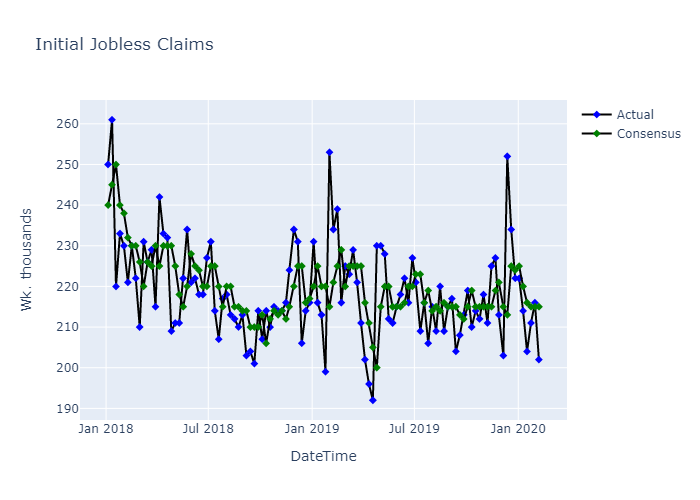

(None, None)

In [6]:
vs.plotly_graph2(data_raw['DateTime'], data_raw['Actual'], data_raw['Consensus'], data_raw.columns[1],
data_raw.columns[2], data_raw.columns[0], "Wk. thousands", "Initial Jobless Claims")

In [7]:
data_raw['Diff']=data_raw['Actual']-data_raw['Consensus']
data_raw.head()

,DateTime,Actual,Consensus,Previous,Diff
0,2020-02-06 13:30:00,202.0,215.0,216.0,-13.0
1,2020-01-30 13:30:00,216.0,215.0,211.0,1.0
2,2020-01-23 13:30:00,211.0,215.0,204.0,-4.0
3,2020-01-16 13:30:00,204.0,216.0,214.0,-12.0
4,2020-01-09 13:30:00,214.0,220.0,222.0,-6.0


In [8]:
help(vs.plotly_graph1)

Help on function plotly_graph1 in module visualizations:

plotly_graph1(x, y, name, x_label, y_label, title)
    Function that plots a one-trace line+marker graph with plotly for time-series 
    reports Differences between Actual and Consensus in weekly statements.
    
        Parameters
        ----------
        x: Datetime values should be set as index for plotly chart. 
        y: Values of reports results Difference (Actual-Consensus) in df cols. 
        name: Label of y trace (str). 
        x_label: xlabel for plot (str). 
        y_label: y_label for plot (str).          
        title: Title of the plot (str). 
        Returns
        -------
        Returns 1 trace equal to y = difference (A-C) showing if forecasts are Beaten or Missed.



+ <font color= green> <font size = 2> **Beat** <font color= white> *(Actual<Consensus):* Economic Growth expected.

+ <font color= red> <font size = 2> **Miss** <font color= white> *(Actual>Consensus)*: Economic Decline expected.

This indicator shouldn't be taken lightly as it can be identified rather quickly how Initial Jobless Claims indicator seems to sound the alarm before economic declines. <br />
In this 2-year sample it can be quickly noticed that the biggest difference and greater miss from estimates was in Dic 2019. <br />
On Thursday's report, official data showed that 39,000 more americans than expected, filed for unemployment insurance for the *first time* during the previous week. <br />

Just a few months later, Covid crisis made itself clear for the American economy and sooner or later, for the rest of the world.

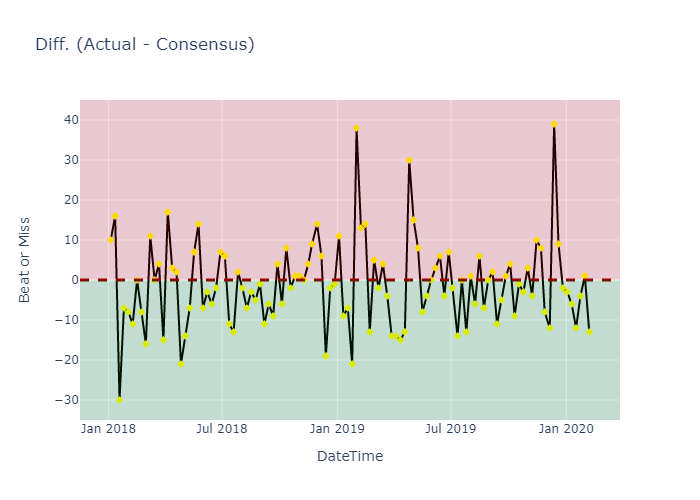

(None, None)

In [9]:
vs.plotly_graph1(data_raw['DateTime'], data_raw['Diff'], data_raw.columns[4], data_raw.columns[0], "Beat or Miss", 'Diff. (Actual - Consensus)')


In [10]:
Cases = pd.DataFrame({'Cases':['Worst', 'Best', '3', '4'],
'Assignation': ['Actual >= Consensus >= Previous',
'Actual <= Consensus <= Previous',
'Actual >= Consensus <= Previous',
'Actual <= Consensus >= Previous']})

Cases

,Cases,Assignation
0,Worst,Actual >= Consensus >= Previous
1,Best,Actual <= Consensus <= Previous
2,3,Actual >= Consensus <= Previous
3,4,Actual <= Consensus >= Previous


In [11]:
help(dt.fx_rate)

Help on function fx_rate in module data:

fx_rate(pairs, account, pw, timeframe)
    Function that downloads exchange rates data for given timeframes with MetaTrader 5 api.
    
    Parameters
    ----------
    + pairs: Exchange Rate Currencies (ej. USDMXN, EURUSD)
    + account: Valid Mt5 username credential. (64225494)
    + pw: Valid Mt5 password credential. (movz2vvi)
    + timeframe: Data download temporality: 10M, 30M, H1, H4, D1 (str). 
    -------
    Returns: Returns OHCLV, spreads and Real Volume for selected timeframes (dataframe).



In [12]:
pairs, account, pw, timeframe = 'EURUSD', 64225494, 'movz2vvi', '30M'
EURUSD = dt.fx_rate(pairs, account, pw, timeframe)
EURUSD.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2018-01-02 00:00:00,1.20088,1.20094,1.20007,1.20058,107,18,0
1,2018-01-02 00:30:00,1.20058,1.20153,1.20058,1.20135,292,18,0
2,2018-01-02 01:00:00,1.20118,1.20145,1.20045,1.20129,1044,18,0
3,2018-01-02 01:30:00,1.20130,1.20143,1.20087,1.20098,630,18,0
4,2018-01-02 02:00:00,1.20087,1.20159,1.20083,1.20137,277,16,0


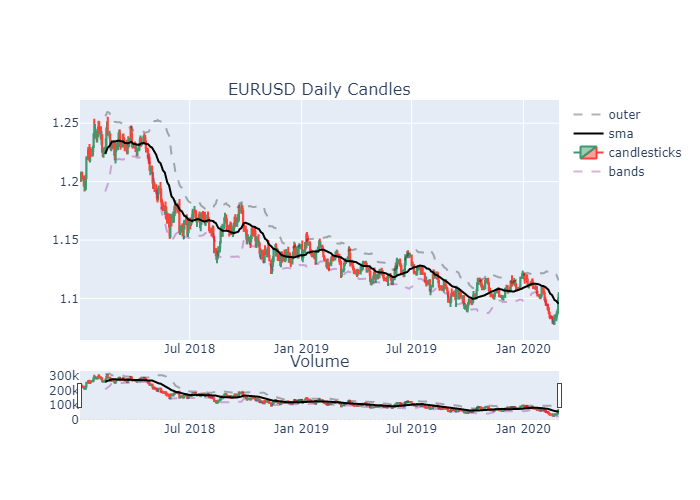

In [13]:
import kaleido
EURUSD_D = dt.fx_rate(pairs, account, pw, 'D1')
vs.OHCLV_csticks(EURUSD_D, 'EURUSD Daily Candles', 'Volume', 30)[0]

<font color= orange> <font size = 5> 2. Section 2 </font>

<font color= orange> <font size = 5> 3. Section 3 </font>

### <font color= orange> <font size = 5> 4. Bibliography: </font>

<font color= lightgray>

+ Villalobos, O, 2021. *Python Project Template*. Available at: https://github.com/OmarVillalobos/python-project. 

+ ETA, (2022). *United States Department of Labor*. Available at: https://www.dol.gov/agencies/eta 
(Accessed: November 21, 2022). 

